<a href="https://colab.research.google.com/github/KK-Niraj/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/EDA Capstone Projects/Machine Learning/Unsupervised ML/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
# Check Total rows and Columns in dataset.
print(f' The shape of dataset is {(dataset.shape)} \n Total Rows are : {(dataset.shape)[0]}\n Total Columns are : {(dataset.shape)[1]}')

 The shape of dataset is (7787, 12) 
 Total Rows are : 7787
 Total Columns are : 12


In [5]:
# Checking first 5 rows in dataset
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
# Checking last 5 rows in dataset
dataset.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [7]:
# Columns name
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
# Information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## Data processing

In [9]:
# checking for identical rows if present
dataset.duplicated().sum()

0

In [10]:
# Checking Null values
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
# Total null values
dataset.isnull().sum().sum()

3631

There are 3631 null values in the dataset, 2389 null values in director column, 718 null values in cast column ,507 null values in country column ,10 in date_added and 7 in rating. so we need to handle the null values

In [12]:
# 2 commit

In [13]:
dataset.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [14]:
# Replacing the null values in cast column
dataset['cast'].fillna(value = 'Unknown',inplace=True)

In [15]:
# Replacing the null values in country column
dataset['country'].fillna(value = dataset['country'].mode()[0],inplace=True) 

In [16]:
# Replacing the null values in director column
dataset['director'].fillna(value = 'Unknown',inplace=True)

In [17]:
# 'date_added' and 'rating' contains an insignificant portion of the null data so we will drop them from the dataset
dataset.dropna(subset=['date_added','rating'],inplace=True)

In [18]:
# again checking is there any null values are not
dataset.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [19]:
# Adding the Month-added and year_addedcolumn in our dataset
import datetime as dt
dataset["date_added"] = pd.to_datetime(dataset['date_added'])

# Year_added
dataset['year_added'] = dataset['date_added'].dt.year

#Adding month column from 'date_added'
dataset['month_added'] = dataset['date_added'].dt.month
dataset['month_name_added'] = dataset['date_added'].dt.month_name()

# Droping the month_added columns
dataset.drop(['date_added'],axis=1,inplace=True)

In [20]:
# Lets retrieve just the first country
dataset['principal_country'] = dataset['country'].apply(lambda x: x.split(",")[0])

In [21]:
# Creating a dictionary for rating_ages
rating_ages = {'TV-PG': 'Older Kids',
               'TV-MA': 'Adults',
               'TV-Y7-FV': 'Older Kids',
               'TV-Y7': 'Older Kids',
               'TV-14': 'Young Adults',
               'R': 'Adults',
               'TV-Y': 'Kids',
               'NR': 'Adults',
               'PG-13': 'Teens',
               'TV-G': 'Kids',
               'PG': 'Older Kids',
               'G': 'Kids',
               'UR': 'Adults',
               'NC-17': 'Adults'}
# Creating new column for age_rating
dataset['age_rating'] = dataset['rating'].apply(lambda x :rating_ages[x])

# Checking unique values for column age_rating
dataset['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

## Exploratory Data Analysis

### Analyze the type of content available on Netflix

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


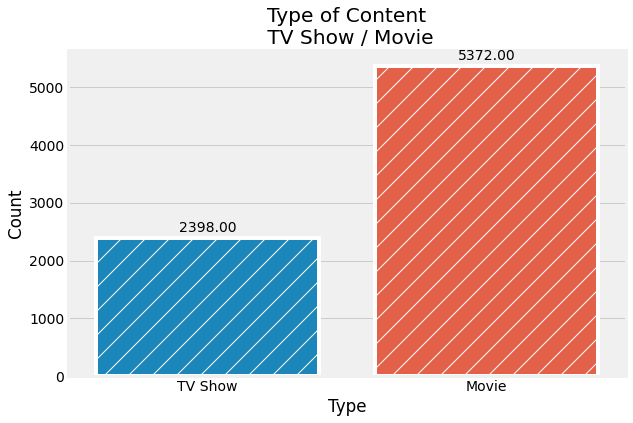

In [22]:
# Countplot to visualize the number of movies and tv_shows in type column
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = sns.countplot('type',data = dataset, lw=4, ec='white',hatch='/')
plt.title('Type of Content\n TV Show / Movie')
plt.xlabel('Type')
plt.ylabel('Count')

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',fontsize=14)

Netflix has 5372 movies and 2398 TV shows, there are more number movies on Netflix than TV shows.

In [23]:
# 3 commit

### Movie ratings analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


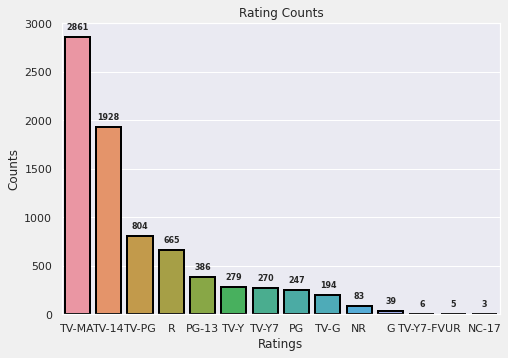

In [24]:
# Plotting the countplot for the ratings
plt.figure(figsize=(7,5))
sns.set(style = "darkgrid")
ax = sns.countplot('rating',data = dataset,lw=2, ec='black', order = dataset['rating'].value_counts().index)
plt.title('Rating Counts')
plt.xlabel('Ratings')
plt.ylabel('Counts')

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points',fontsize=8, fontweight='bold')

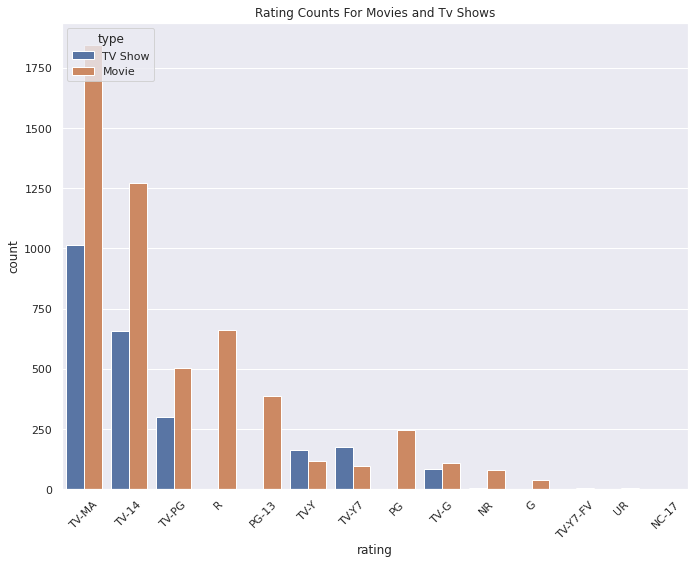

In [25]:
#Plotting the same on a comparison plot
sns.set()
plt.figure(figsize=(10,8))
ax=sns.countplot(x="rating",data= dataset,hue= "type",order = dataset['rating'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.title("Rating Counts For Movies and Tv Shows")
plt.show()

In [ ]:
# 4 commit

In [32]:
#creating two extra variables
tv_shows = dataset[dataset['type'] == 'TV Show']
movies = dataset[dataset['type'] == 'Movie']

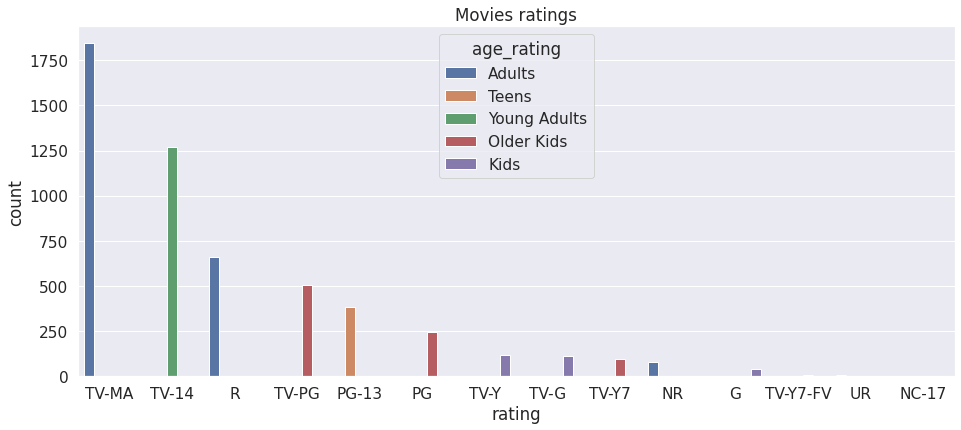

In [41]:
# Movies Ratings based on Rating Age Groups
plt.figure(figsize=(14,6))
plt.title('Movies ratings')
sns.countplot(x = 'rating', hue = 'age_rating', data = movies, order = movies['rating'].value_counts().index)

TV-MA has the highest number of count for movies i.e, adult ratings.

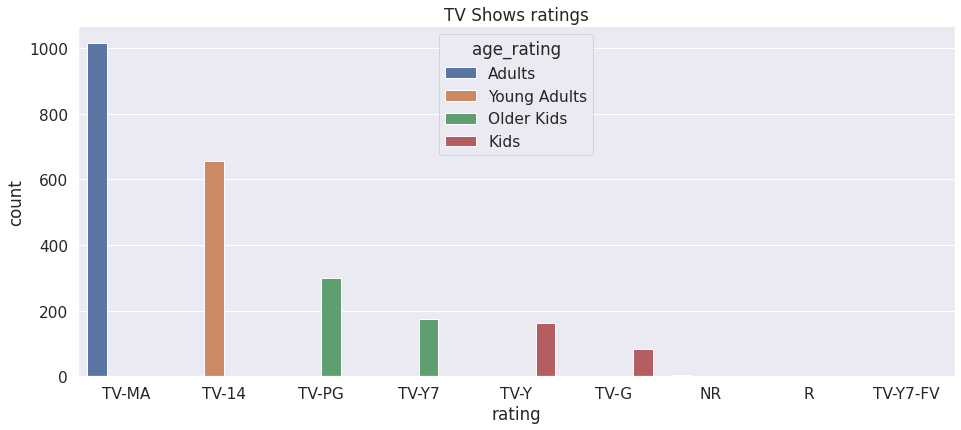

In [34]:
# TV Shows Ratings based on Rating Age Groups
plt.figure(figsize=(14,6))
plt.title('TV Shows ratings')
sns.countplot(x = 'rating', hue = 'age_rating', data = tv_shows, order = tv_shows['rating'].value_counts().index)

TV-MA has the highest number of count for tv shows i.e, adult ratings in both the cases TV-MA has the highest number of count.

### Release Year

In [35]:
# Creating a series containing number of movies released per year in descending order.
movies_year = movies['release_year'].value_counts().sort_index(ascending=False)

In [36]:
# Creating a series containing number of tv shows released per year in descending order.
tvshows_year = tv_shows['release_year'].value_counts().sort_index(ascending=False)

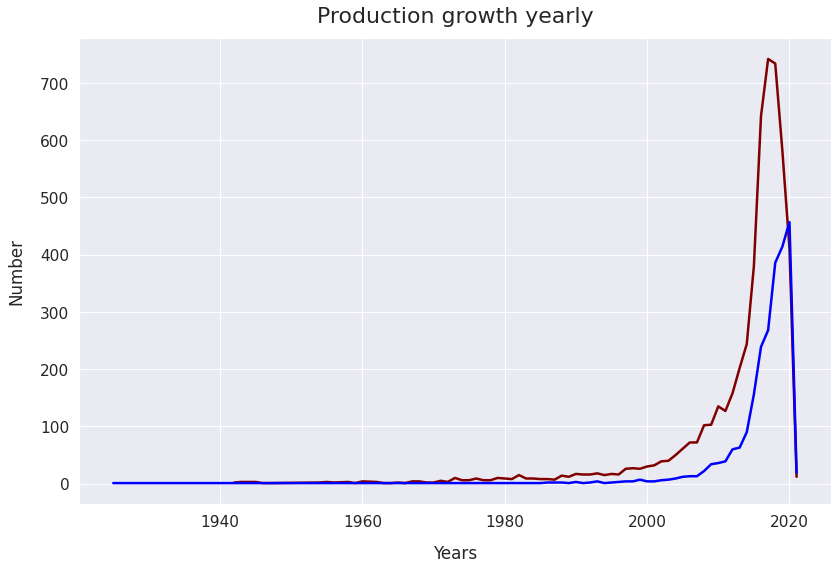

In [37]:
# Visualizing the movies and tv_shows based on the release year
sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
tvshows_year.plot(figsize=(12, 8), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22);

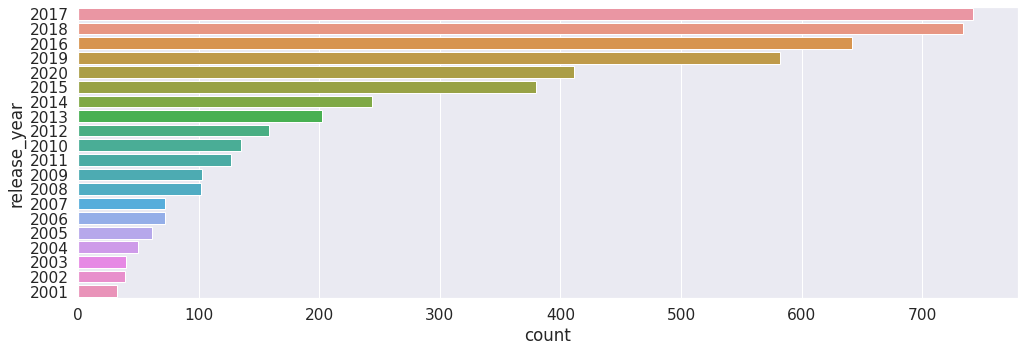

In [38]:
# Analysing how many movies released per year in last 20 years
plt.figure(figsize=(15,5))
sns.countplot(y = 'release_year',data = movies,order = movies['release_year'].value_counts().index[0:20])

Highest number of movies released in 2017 and 2018

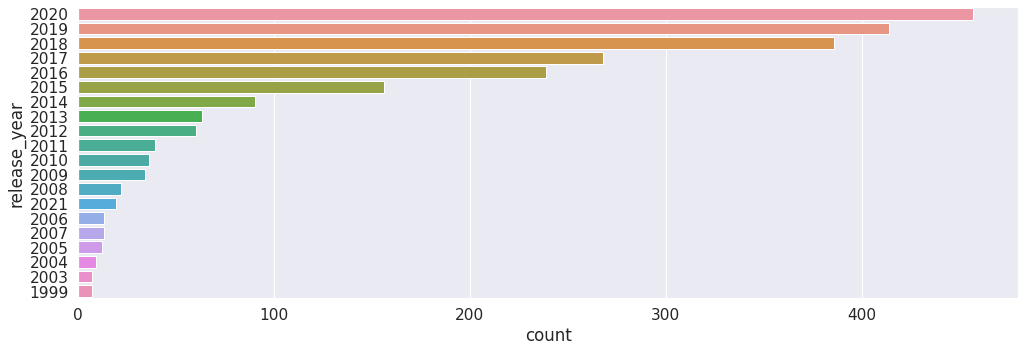

In [40]:
# Analysing how many tv_shows released per year in last 20 years
plt.figure(figsize=(15,5))
sns.countplot(y= 'release_year', data = tv_shows, order = tv_shows['release_year'].value_counts().index[0:20])

Highest number of TV Shows released in 2020 and 2019.